# Seleção da Database
## Database: 
Brazilian E-Commerce Public Database by Olist
https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

### Descrição: 
A database foi provida pela Olist, uma empresa de marketplace situada no Brasil. A Olist conecta pequenos negócios por todo o Brasil de uma forma simples. Vendedores conseguem vender seus produtos diretamente pela Olist Store, as entregas são feitas por meio de parceiros.

### Problema de Negócio:
Quais são os principais fatores que alavancam o número de vendas? Quais os fatores que impactam na avaliação do cliente?

### Observação:
Esse é o segundo notebook, onde iremos realizar clusterização e analisar os mesmos afim de promover insights. No primeiro notebook com o prefixo '01', realizamos toda a visualização do conjunto, onde foram retirados alguns insights que serão utilizados ao longo das proximas etapas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

from warnings import simplefilter
from functools import reduce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from math import ceil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Herikc Brecher e João Hutner" --iversions

Author: Herikc Brecher e João Hutner

numpy     : 1.19.5
matplotlib: 3.2.0
seaborn   : 0.11.1
pandas    : 1.2.4
re        : 2.2.1



In [3]:
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sns.set_theme()

In [4]:
# Seed de Aleatoriedade
seed_ = 194
np.random.seed(seed_)

# 1. Carregamento dos Dados

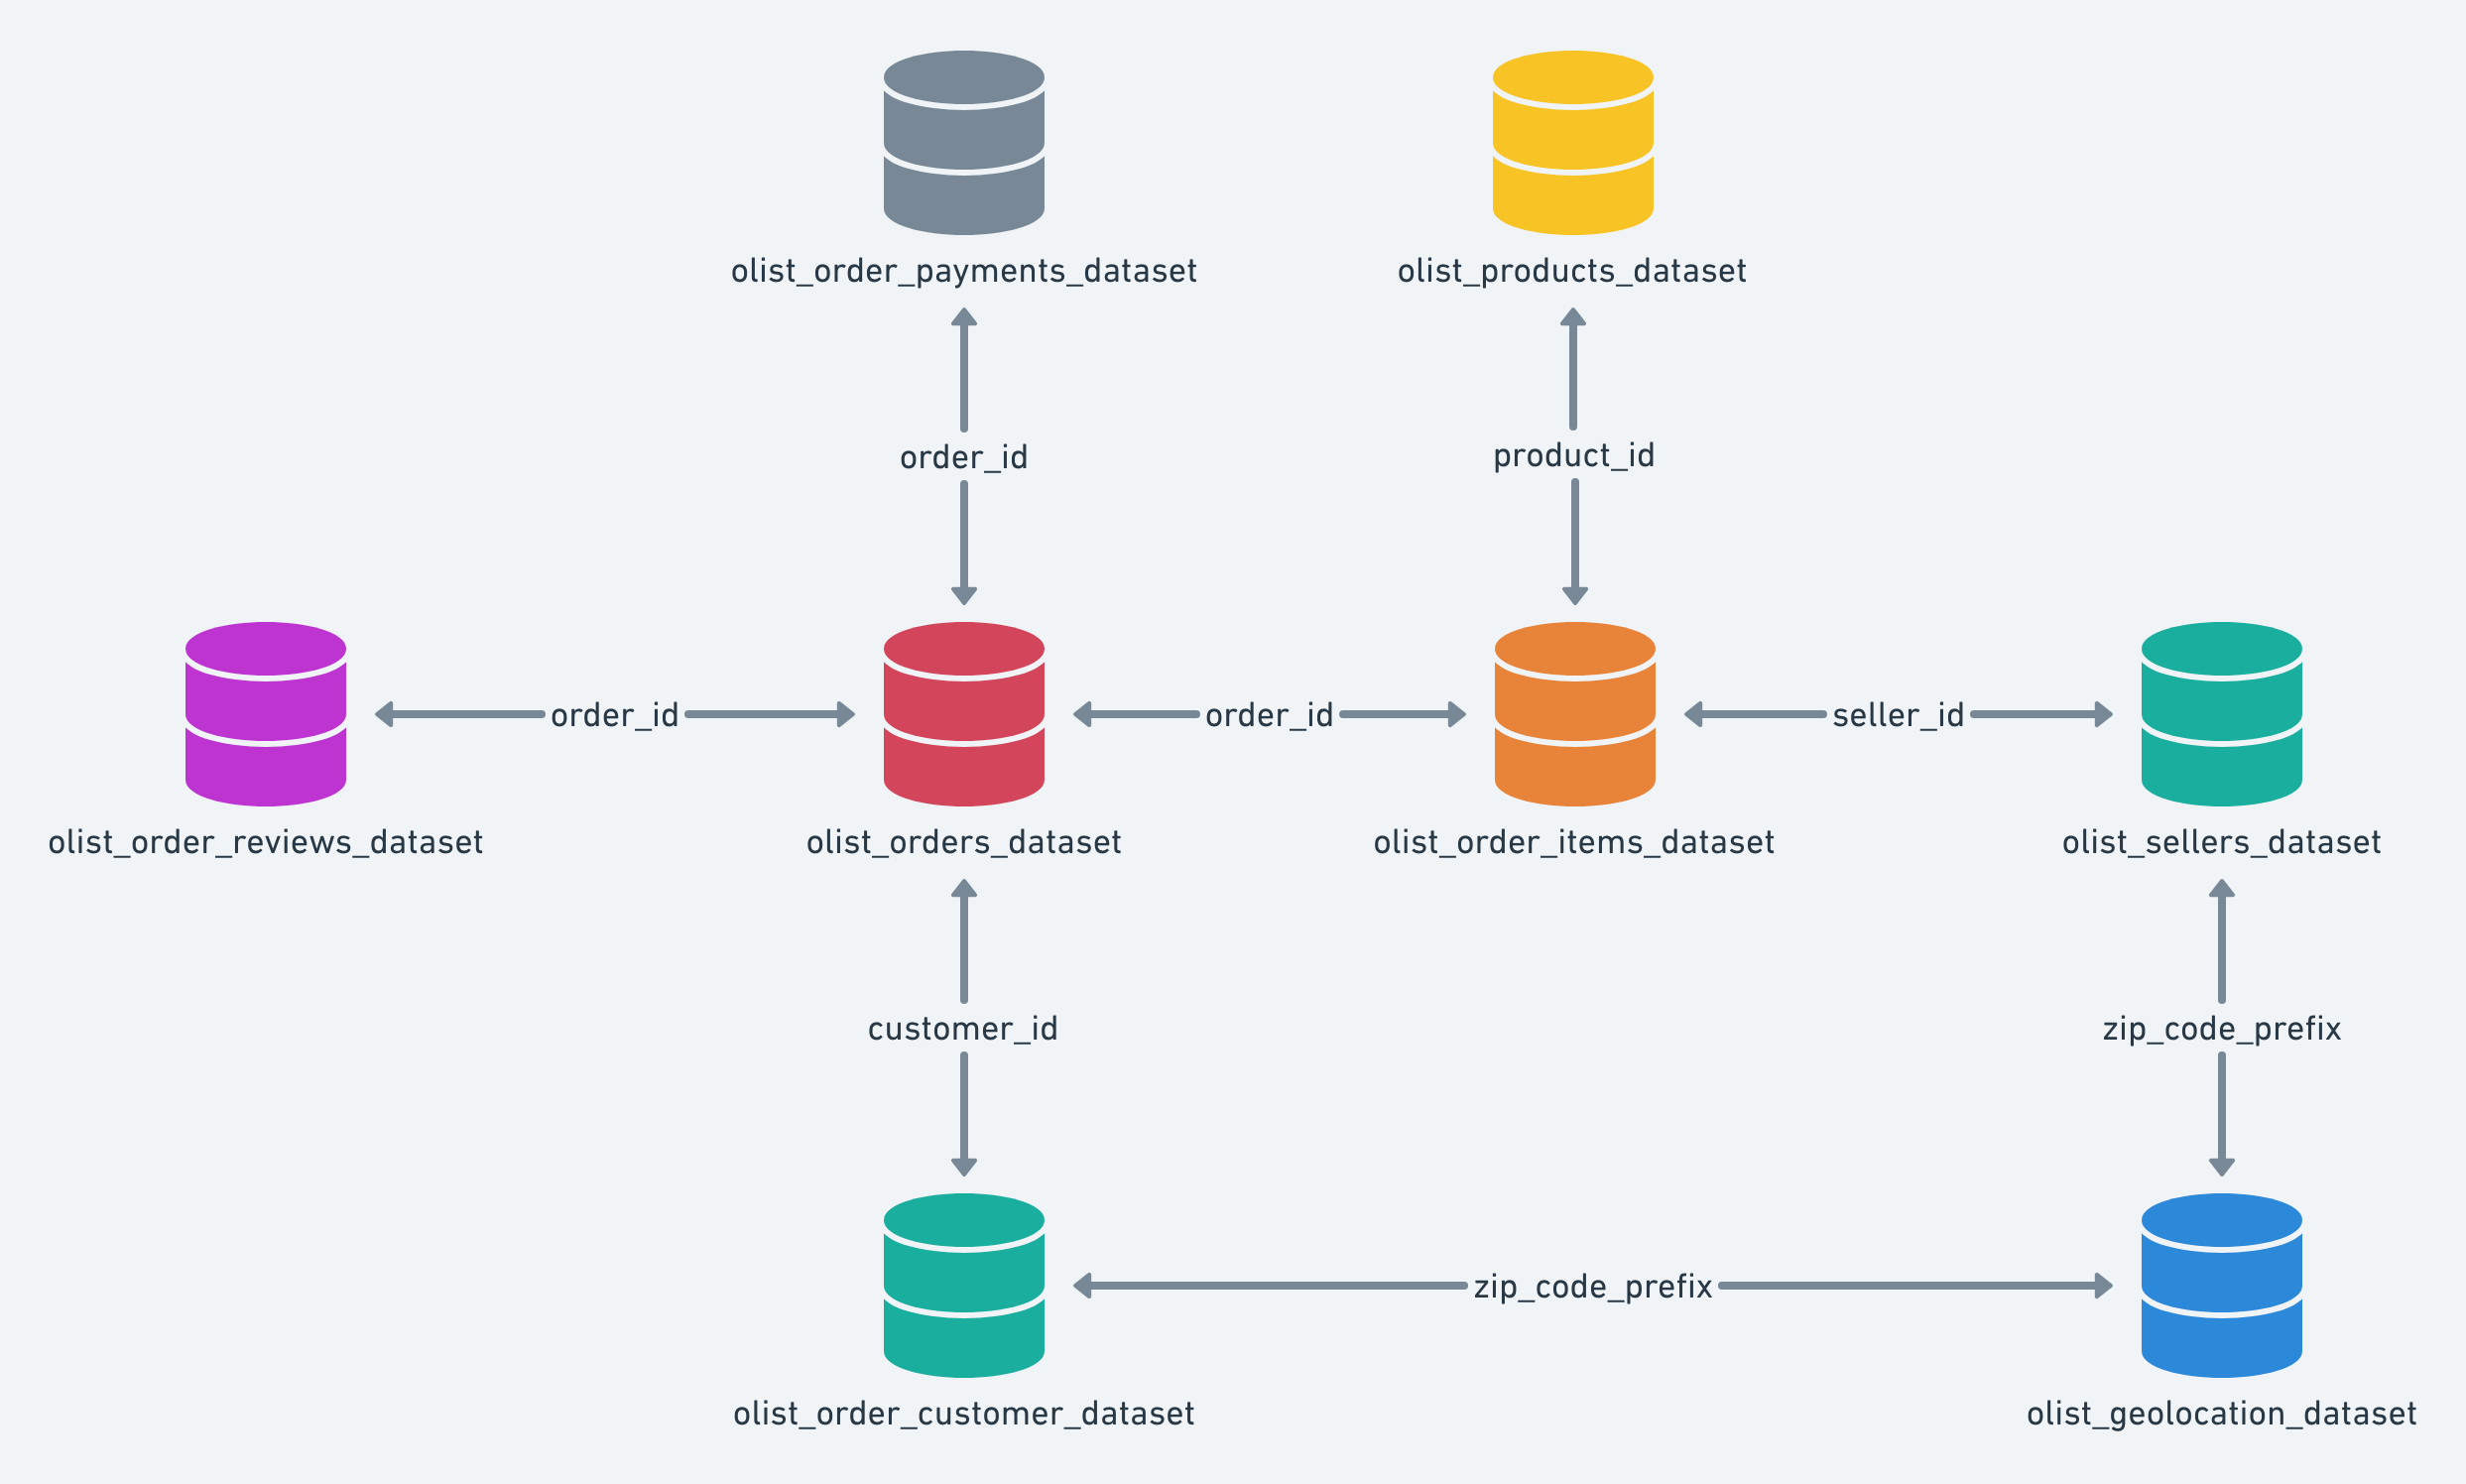

In [5]:
# Carregamento de todos datasets
dtCustomers = pd.read_csv('../data/olist_customers_dataset.csv', encoding = 'utf8', dtype={'customer_zip_code_prefix': str})
dtGeolocation = pd.read_csv('../data/olist_geolocation_dataset.csv', encoding = 'utf8', dtype={'geolocation_zip_code_prefix': str})
dtOrderItems = pd.read_csv('../data/olist_order_items_dataset.csv', encoding = 'utf8')
dtOrderPayments = pd.read_csv('../data/olist_order_payments_dataset.csv', encoding = 'utf8')
dtOrderReviews = pd.read_csv('../data/olist_order_reviews_dataset.csv', encoding = 'utf8')
dtOrders = pd.read_csv('../data/olist_orders_dataset.csv', encoding = 'utf8')
dtProducts = pd.read_csv('../data/olist_products_dataset.csv', encoding = 'utf8')
dtSellers = pd.read_csv('../data/olist_sellers_dataset.csv', encoding = 'utf8')

## 2. Pre-Processamento

## 2.1 Feature Engineering

Iremos adicionar uma variavel extra para todos os datasets que contém o Estado. A variavel adicionada é a Região referente ao Estado.

In [6]:
regioes = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'CentroOeste',
    'ES': 'Sudeste',
    'GO': 'CentroOeste',
    'MA': 'Nordeste',
    'MT': 'CentroOeste',
    'MS': 'CentroOeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

In [7]:
dtCustomers['regiao'] =  dtCustomers['customer_state'].copy()

In [8]:
dtCustomers = dtCustomers.replace({'regiao': regioes})

In [9]:
dtCustomers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste


In [10]:
dtSellers['regiao'] =  dtSellers['seller_state'].copy()

In [11]:
dtSellers = dtCustomers.replace({'regiao': regioes})

In [12]:
dtSellers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste


In [13]:
dtGeolocation['regiao'] =  dtGeolocation['geolocation_state'].copy()

In [14]:
dtGeolocation = dtGeolocation.replace({'regiao': regioes})

In [15]:
dtGeolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,regiao
0,01037,-23.545621,-46.639292,sao paulo,SP,Sudeste
1,01046,-23.546081,-46.644820,sao paulo,SP,Sudeste
2,01046,-23.546129,-46.642951,sao paulo,SP,Sudeste
3,01041,-23.544392,-46.639499,sao paulo,SP,Sudeste
4,01035,-23.541578,-46.641607,sao paulo,SP,Sudeste


## 2.2 Construindo Datasets

Devido ao problema em questão ser dividido em 8 datasets diferentes, iremos construir datasets mais unificados afim de facilitar o processo de tratamento dos dados e clusterização.

In [16]:
dtCustomers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste


In [17]:
dtGeolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,regiao
0,01037,-23.545621,-46.639292,sao paulo,SP,Sudeste
1,01046,-23.546081,-46.644820,sao paulo,SP,Sudeste
2,01046,-23.546129,-46.642951,sao paulo,SP,Sudeste
3,01041,-23.544392,-46.639499,sao paulo,SP,Sudeste
4,01035,-23.541578,-46.641607,sao paulo,SP,Sudeste


In [18]:
dtOrderItems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
dtOrderPayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [20]:
dtOrderReviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
dtOrders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
dtProducts.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
dtSellers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sudeste


## 2.2.1 Unificando Dataset de Pedidos

In [24]:
listDtMergeOrders = [dtOrderItems[['order_id', 'freight_value']], dtOrderPayments, dtOrderReviews, dtOrders,\
                    dtOrderItems.groupby('order_id').agg({'order_item_id': max}).reset_index()]

In [25]:
dtGeneralOrders = reduce(lambda left, right: pd.merge(left, right, on = 'order_id'), listDtMergeOrders)

In [26]:
dtGeneralOrders = pd.merge(dtGeneralOrders, dtCustomers[['customer_id', 'customer_city', 'customer_state', 'regiao']],\
                           on = 'customer_id')

In [27]:
dtGeneralOrders.head()

,order_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_city,customer_state,regiao
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,campos dos goytacazes,RJ,Sudeste
1,00018f77f2f0320c557190d7a144bdd3,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1,santa fe do sul,SP,Sudeste
2,000229ec398224ef6ca0657da4fc703e,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1,para de minas,MG,Sudeste
3,00024acbcdf0a6daa1e931b038114c75,12.79,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1,atibaia,SP,Sudeste
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1,credit_card,3,218.04,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1,varzea paulista,SP,Sudeste


In [28]:
# Mantendo somente Ano, Mes e Dia
dtGeneralOrders['order_purchase_timestamp'] = \
    pd.to_datetime(dtGeneralOrders['order_purchase_timestamp'], format = '%Y-%m-%d %H:%M:%S').dt.to_period('d')

In [29]:
# Mantendo somente Ano, Mes e Dia
dtGeneralOrders['order_delivered_customer_date'] = \
    pd.to_datetime(dtGeneralOrders['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S').dt.to_period('d')

In [30]:
# Mantendo somente Ano, Mes e Dia
dtGeneralOrders['order_estimated_delivery_date'] = \
    pd.to_datetime(dtGeneralOrders['order_estimated_delivery_date'], format = '%Y-%m-%d %H:%M:%S').dt.to_period('d')

In [31]:
dtGeneralOrders['diff_delivery_and_estimate'] = dtGeneralOrders['order_estimated_delivery_date'] -\
                                           dtGeneralOrders['order_delivered_customer_date']

In [32]:
dtGeneralOrders['diff_delivery_and_purchase'] = dtGeneralOrders['order_purchase_timestamp'] -\
                                           dtGeneralOrders['order_delivered_customer_date']

In [33]:
dtGeneralOrders['diff_delivery_and_estimate'] = \
                dtGeneralOrders['diff_delivery_and_estimate'].apply(lambda x: re.sub("[^0-9]", "", str(x)))

In [34]:
dtGeneralOrders['diff_delivery_and_purchase'] = \
                dtGeneralOrders['diff_delivery_and_purchase'].apply(lambda x: re.sub("[^0-9]", "", str(x)))

In [35]:
dtGeneralOrders['diff_delivery_and_estimate'] = pd.to_numeric(dtGeneralOrders['diff_delivery_and_estimate'])

In [36]:
dtGeneralOrders['diff_delivery_and_purchase'] = pd.to_numeric(dtGeneralOrders['diff_delivery_and_purchase'])

In [37]:
dtGeneralOrders.head()

,order_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,customer_city,customer_state,regiao,diff_delivery_and_estimate,diff_delivery_and_purchase
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20,2017-09-29,1,campos dos goytacazes,RJ,Sudeste,9.0,7.0
1,00018f77f2f0320c557190d7a144bdd3,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12,2017-05-15,1,santa fe do sul,SP,Sudeste,3.0,16.0
2,000229ec398224ef6ca0657da4fc703e,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22,2018-02-05,1,para de minas,MG,Sudeste,14.0,8.0
3,00024acbcdf0a6daa1e931b038114c75,12.79,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14,2018-08-20,1,atibaia,SP,Sudeste,6.0,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1,credit_card,3,218.04,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01,2017-03-17,1,varzea paulista,SP,Sudeste,16.0,25.0


In [38]:
dtGeneralOrders = dtGeneralOrders[['order_id', 'freight_value', 'payment_type', 'payment_installments', 'payment_value',\
                                 'review_score', 'order_status', 'order_item_id',\
                                  'diff_delivery_and_estimate', 'diff_delivery_and_purchase',\
                                  'customer_state', 'regiao']]

In [39]:
dtGeneralOrders.head()

,order_id,freight_value,payment_type,payment_installments,payment_value,review_score,order_status,order_item_id,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,regiao
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,credit_card,2,72.19,5,delivered,1,9.0,7.0,RJ,Sudeste
1,00018f77f2f0320c557190d7a144bdd3,19.93,credit_card,3,259.83,4,delivered,1,3.0,16.0,SP,Sudeste
2,000229ec398224ef6ca0657da4fc703e,17.87,credit_card,5,216.87,5,delivered,1,14.0,8.0,MG,Sudeste
3,00024acbcdf0a6daa1e931b038114c75,12.79,credit_card,2,25.78,4,delivered,1,6.0,6.0,SP,Sudeste
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,credit_card,3,218.04,5,delivered,1,16.0,25.0,SP,Sudeste


In [40]:
dtGeneralOrders = dtGeneralOrders[dtGeneralOrders['order_status'] == 'delivered']

In [41]:
print(dtGeneralOrders.isna().sum())

order_id                         0
freight_value                    0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
order_status                     0
order_item_id                    0
diff_delivery_and_estimate    1674
diff_delivery_and_purchase       8
customer_state                   0
regiao                           0
dtype: int64


In [42]:
# Dropando valores NA
dtGeneralOrders = dtGeneralOrders.dropna()

In [43]:
dtGeneralOrders = dtGeneralOrders.drop('order_status', axis = 1)

In [44]:
dtGeneralOrders.shape

(114054, 11)

In [45]:
dtGeneralOrders.head()

,order_id,freight_value,payment_type,payment_installments,payment_value,review_score,order_item_id,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,regiao
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,credit_card,2,72.19,5,1,9.0,7.0,RJ,Sudeste
1,00018f77f2f0320c557190d7a144bdd3,19.93,credit_card,3,259.83,4,1,3.0,16.0,SP,Sudeste
2,000229ec398224ef6ca0657da4fc703e,17.87,credit_card,5,216.87,5,1,14.0,8.0,MG,Sudeste
3,00024acbcdf0a6daa1e931b038114c75,12.79,credit_card,2,25.78,4,1,6.0,6.0,SP,Sudeste
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,credit_card,3,218.04,5,1,16.0,25.0,SP,Sudeste


In [46]:
dtGeneralOrders = dtGeneralOrders.rename(columns = {'order_item_id': 'quantity', 'regiao': 'customer_region'})

In [47]:
dtGeneralOrders.head()

,order_id,freight_value,payment_type,payment_installments,payment_value,review_score,quantity,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,customer_region
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,credit_card,2,72.19,5,1,9.0,7.0,RJ,Sudeste
1,00018f77f2f0320c557190d7a144bdd3,19.93,credit_card,3,259.83,4,1,3.0,16.0,SP,Sudeste
2,000229ec398224ef6ca0657da4fc703e,17.87,credit_card,5,216.87,5,1,14.0,8.0,MG,Sudeste
3,00024acbcdf0a6daa1e931b038114c75,12.79,credit_card,2,25.78,4,1,6.0,6.0,SP,Sudeste
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,credit_card,3,218.04,5,1,16.0,25.0,SP,Sudeste


## 2.3 Preparando os Dados para Clusterização

### 2.3.1 LabelEncoder

In [48]:
dtGeneralOrders.head()

,order_id,freight_value,payment_type,payment_installments,payment_value,review_score,quantity,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,customer_region
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,credit_card,2,72.19,5,1,9.0,7.0,RJ,Sudeste
1,00018f77f2f0320c557190d7a144bdd3,19.93,credit_card,3,259.83,4,1,3.0,16.0,SP,Sudeste
2,000229ec398224ef6ca0657da4fc703e,17.87,credit_card,5,216.87,5,1,14.0,8.0,MG,Sudeste
3,00024acbcdf0a6daa1e931b038114c75,12.79,credit_card,2,25.78,4,1,6.0,6.0,SP,Sudeste
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,credit_card,3,218.04,5,1,16.0,25.0,SP,Sudeste


In [49]:
dtGeneralOrdersProcessado = dtGeneralOrders.copy()

In [50]:
# Realizando LabelEncoder
labelencoderPaymentType = LabelEncoder()
labelencoderCustomerState = LabelEncoder()
labelencoderCustomerRegion = LabelEncoder()

dtGeneralOrdersProcessado['payment_type'] = labelencoderPaymentType.fit_transform(dtGeneralOrders['payment_type'])

dtGeneralOrdersProcessado['customer_state'] =\
                labelencoderCustomerState.fit_transform(dtGeneralOrders['customer_state'])

dtGeneralOrdersProcessado['customer_region'] =\
                labelencoderCustomerRegion.fit_transform(dtGeneralOrders['customer_region'])

In [51]:
dtGeneralOrdersProcessado.head()

,order_id,freight_value,payment_type,payment_installments,payment_value,review_score,quantity,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,customer_region
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,1,2,72.19,5,1,9.0,7.0,18,3
1,00018f77f2f0320c557190d7a144bdd3,19.93,1,3,259.83,4,1,3.0,16.0,25,3
2,000229ec398224ef6ca0657da4fc703e,17.87,1,5,216.87,5,1,14.0,8.0,10,3
3,00024acbcdf0a6daa1e931b038114c75,12.79,1,2,25.78,4,1,6.0,6.0,25,3
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,1,3,218.04,5,1,16.0,25.0,25,3


### 2.3.2 Normalização / Padronização

In [52]:
colunas_quantitativas = ['freight_value', 'payment_value', 'quantity',\
                         'diff_delivery_and_estimate', 'diff_delivery_and_purchase']

In [53]:
def boxplot_individuais(data, columns, width = 15, height = 8):
    fig = plt.figure()
    fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    
    columns_adjust = ceil(len(columns) / 3)
    
    for i, column in enumerate(columns):
        ax = fig.add_subplot(columns_adjust, 3, i + 1)
        sns.boxplot(x = data[column])
        
    plt.tight_layout()  
    plt.show()

In [54]:
def hist_individual(data, columns, width = 10, height = 15):
    fig = plt.figure()
    fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    
    columns_adjust = ceil(len(columns) / 3)
    
    for i, column in enumerate(columns):
        ax = fig.add_subplot(columns_adjust, 3, i + 1)
        data[column].hist(label = column)
        plt.title(column)
        
    plt.tight_layout()  
    plt.show()

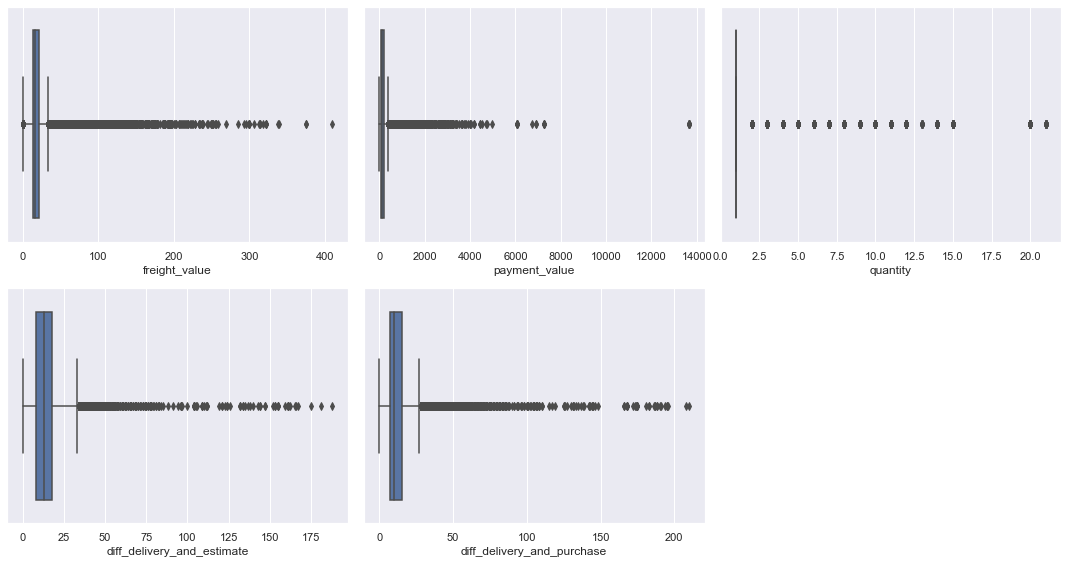

In [55]:
boxplot_individuais(dtGeneralOrdersProcessado, colunas_quantitativas)

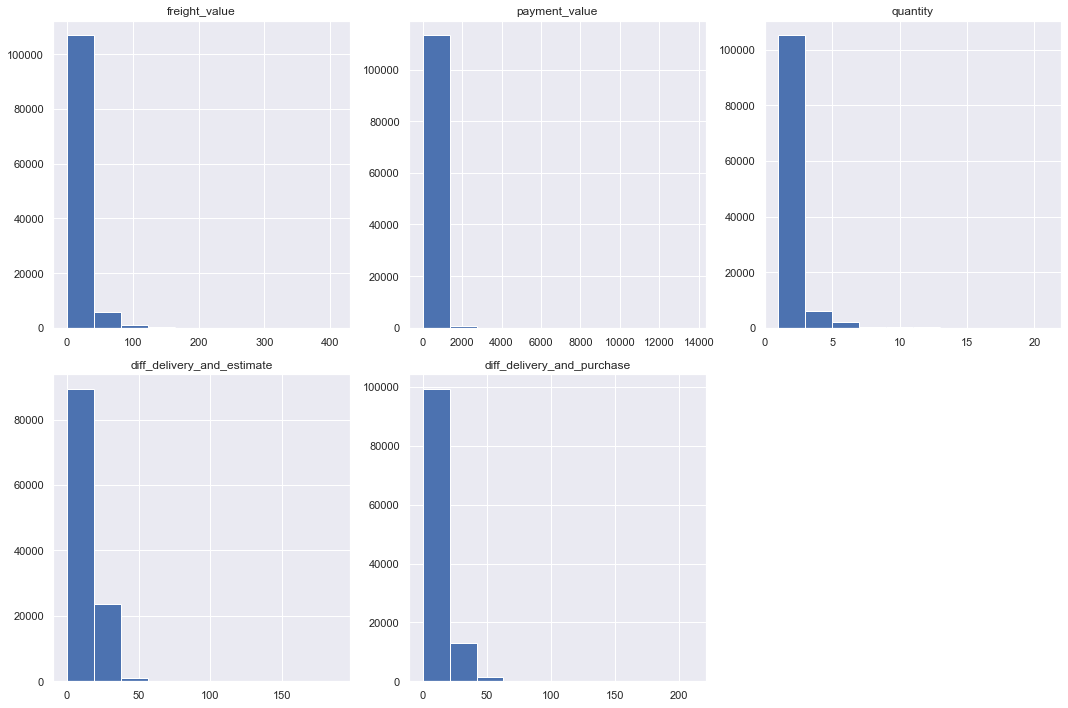

In [56]:
hist_individual(dtGeneralOrdersProcessado, colunas_quantitativas)

In [57]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

In [58]:
dtGeneralOrdersNormalizado = dtGeneralOrdersProcessado.copy()

In [59]:
dtGeneralOrdersNormalizado[colunas_quantitativas] = scaler.fit_transform(dtGeneralOrdersProcessado[colunas_quantitativas])

In [60]:
dtGeneralOrdersNormalizado.head()

,order_id,freight_value,payment_type,payment_installments,payment_value,review_score,quantity,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,customer_region
0,00010242fe8c5a6d1ba2dd792cb16214,-0.426745,1,2,-0.375092,5,-0.354355,-0.564103,-0.567311,18,3
1,00018f77f2f0320c557190d7a144bdd3,-0.005297,1,3,0.329257,4,-0.354355,-1.298337,0.385421,25,3
2,000229ec398224ef6ca0657da4fc703e,-0.136047,1,5,0.167997,5,-0.354355,0.047760,-0.461452,10,3
3,00024acbcdf0a6daa1e931b038114c75,-0.458481,1,2,-0.549303,4,-0.354355,-0.931220,-0.673170,25,3
4,00042b26cf59d7ce69dfabb4e55b4fd9,-0.118910,1,3,0.172389,5,-0.354355,0.292504,1.338153,25,3


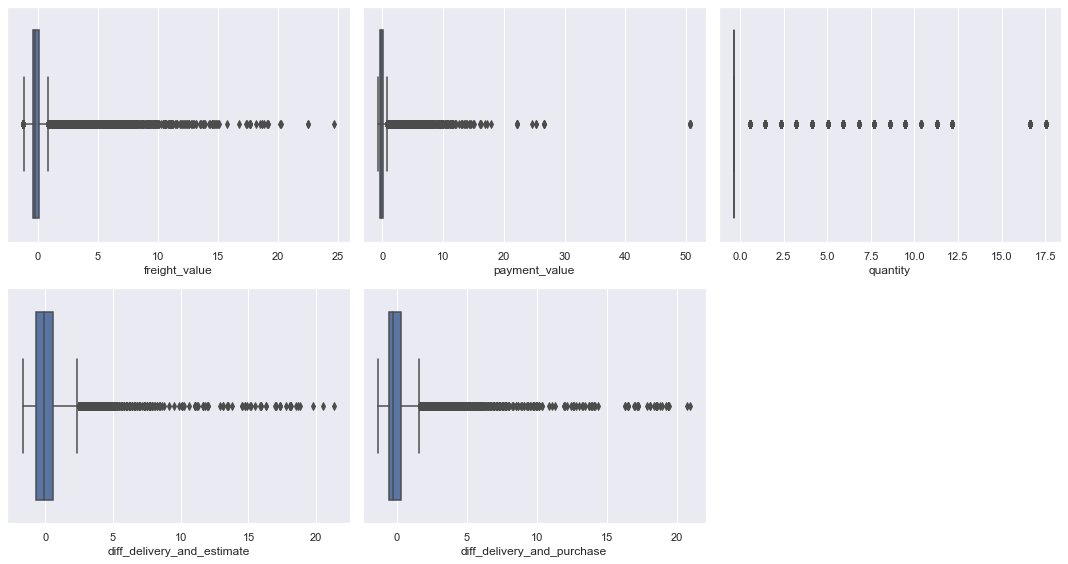

In [61]:
boxplot_individuais(dtGeneralOrdersNormalizado, colunas_quantitativas)

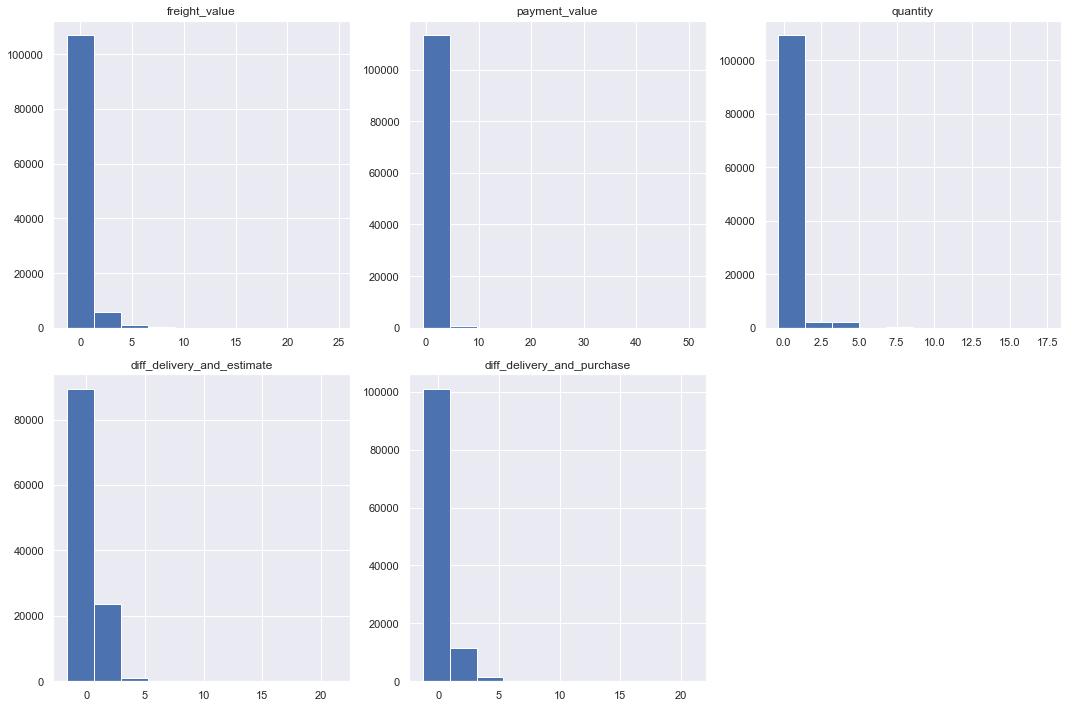

In [62]:
hist_individual(dtGeneralOrdersNormalizado, colunas_quantitativas)

### 2.3.3 Simetria dos Dados

### 2.3.3.1 Skewness

- Se skewness é menor que −1 ou maior que +1, a distribuição é 'highly skewed'.


- Se skewness esta entre −1 e −½ ou entre +½ e +1, a distribuição é 'moderately skewed'.


- Se skewness esta entre −½ e +½, a distribuição é aproximadaente simetrica.

In [63]:
print(dtGeneralOrdersProcessado[colunas_quantitativas].skew(),\
      '\nSoma:', sum(abs(dtGeneralOrdersProcessado[colunas_quantitativas].skew())))

freight_value                  5.558939
payment_value                 14.448540
quantity                       6.331864
diff_delivery_and_estimate     2.846043
diff_delivery_and_purchase     3.912217
dtype: float64 
Soma: 33.09760296622308


In [64]:
print(dtGeneralOrdersNormalizado[colunas_quantitativas].skew(),\
      '\nSoma:', sum(abs(dtGeneralOrdersNormalizado[colunas_quantitativas].skew())))

freight_value                  5.558939
payment_value                 14.448540
quantity                       6.331864
diff_delivery_and_estimate     2.846043
diff_delivery_and_purchase     3.912217
dtype: float64 
Soma: 33.09760296622308


### 2.3.3.2 Kurtosis

- Mesokurtic -> Kurtosis ~= 0: Distribuição normal.


- Leptokurtic -> Kurtosis > 0: Valores proximos a media ou dos extremos.


- Platykurtic -> Kurtosis < 0: Valores muito espalhados.

In [65]:
print(dtGeneralOrdersProcessado[colunas_quantitativas].kurtosis(),\
      '\nSoma:', sum(abs(dtGeneralOrdersProcessado[colunas_quantitativas].kurtosis())))

freight_value                  58.300861
payment_value                 530.034479
quantity                       68.366469
diff_delivery_and_estimate     32.528515
diff_delivery_and_purchase     40.794495
dtype: float64 
Soma: 730.0248192377511


In [66]:
print(dtGeneralOrdersNormalizado[colunas_quantitativas].kurtosis(),\
      '\nSoma:', sum(abs(dtGeneralOrdersNormalizado[colunas_quantitativas].kurtosis())))

freight_value                  58.300861
payment_value                 530.034479
quantity                       68.366469
diff_delivery_and_estimate     32.528515
diff_delivery_and_purchase     40.794495
dtype: float64 
Soma: 730.024819237751


### 2.4 Analise de Clusterização

In [67]:
dtGeneralOrdersFinal = dtGeneralOrdersNormalizado.drop('order_id', axis = 1)

In [68]:
dtGeneralOrdersFinal.head()

,freight_value,payment_type,payment_installments,payment_value,review_score,quantity,diff_delivery_and_estimate,diff_delivery_and_purchase,customer_state,customer_region
0,-0.426745,1,2,-0.375092,5,-0.354355,-0.564103,-0.567311,18,3
1,-0.005297,1,3,0.329257,4,-0.354355,-1.298337,0.385421,25,3
2,-0.136047,1,5,0.167997,5,-0.354355,0.047760,-0.461452,10,3
3,-0.458481,1,2,-0.549303,4,-0.354355,-0.931220,-0.673170,25,3
4,-0.118910,1,3,0.172389,5,-0.354355,0.292504,1.338153,25,3


In [69]:
dtGeneralOrdersFinal[dtGeneralOrdersFinal.columns.difference(colunas_quantitativas)].head()

,customer_region,customer_state,payment_installments,payment_type,review_score
0,3,18,2,1,5
1,3,25,3,1,4
2,3,10,5,1,5
3,3,25,2,1,4
4,3,25,3,1,5


### 2.4.1 Elbow

In [70]:
# Determinando um range de K
k_range = range(1, 12)

In [71]:
# Aplicando o modelo K-Means para cada valor de K
k_means_var = [KMeans(n_clusters = k).fit(dtGeneralOrdersFinal) for k in k_range]

In [72]:
# Ajustando o centróide do cluster para cada modelo
intertia = [X.inertia_ for X in k_means_var]

Analisando a metrica de Elbow é verificado que o numero ideal para K seria 6. Pois, a queda da distancia passa a diminuir fortemente em K = 4, e em 6 tem uma redução brusca novamente.

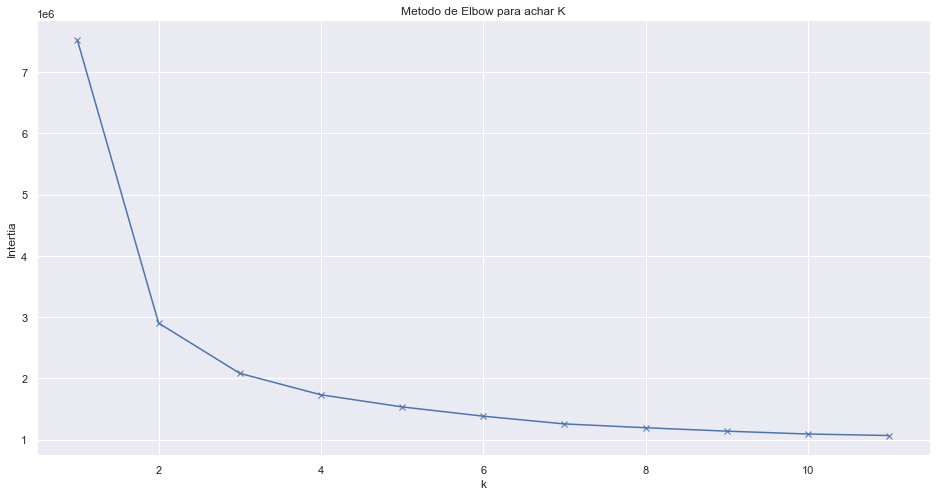

In [73]:
plt.figure(figsize=(16,8))
plt.plot(k_range, intertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Intertia')
plt.title('Metodo de Elbow para achar K')
plt.show()

In [127]:
dtGeneralOrdersTemp = dtGeneralOrdersFinal[:57028].copy()

In [ ]:
# Determinando um range de K
k_range = range(1, 10)

In [129]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(dtGeneralOrdersTemp) for k in k_range]

In [130]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [131]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(dtGeneralOrdersTemp, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [132]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [133]:
# Soma total dos quadrados
soma_total = sum(pdist(dtGeneralOrdersTemp)**2)/dtGeneralOrdersTemp.shape[0]

In [134]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Novamente verificando a variancia dos dados de acordo com cada valor de K, encontramos que o valor ideal é 6.

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

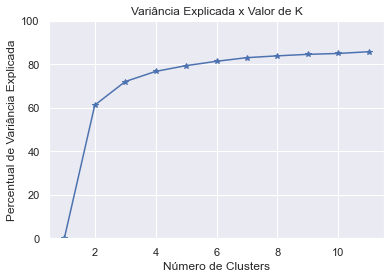

In [135]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

### 2.4.2 Molegando Clusters

In [74]:
def testa_k(pca_data, k = 2):
    # Criando um modelo
    modelo = KMeans(n_clusters = k)
    modelo.fit(pca_data)
    
    # Obtém os valores mínimos e máximos e organiza o shape
    x_min, x_max = pca_data[:, 0].min() - 5, pca_data[:, 0].max() - 1
    y_min, y_max = pca_data[:, 1].min() + 1, pca_data[:, 1].max() + 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot das áreas dos clusters
    plt.figure(figsize = (8, 8))
    plt.clf()
    plt.imshow(Z, 
               interpolation = 'nearest',
               extent = (xx.min(), xx.max(), yy.min(), yy.max()),
               cmap = plt.cm.Paired,
               aspect = 'auto', 
               origin = 'lower')
    plt.show()
    
    # Plot dos centróides
    plt.figure(figsize = (13, 13))
    plt.plot(pca_data[:, 0], pca_data[:, 1], 'k.', markersize = 4)
    centroids = modelo.cluster_centers_
    inert = modelo.inertia_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 5, color = 'r', zorder = 8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    # Silhouette Score
    labels = modelo.labels_ 
    print(f"Silhouette Score: {silhouette_score(pca_data, labels, metric = 'euclidean')}")

In [75]:
# Aplica redução de dimensionalidade
pca = PCA(n_components = 2).fit_transform(dtGeneralOrdersFinal)

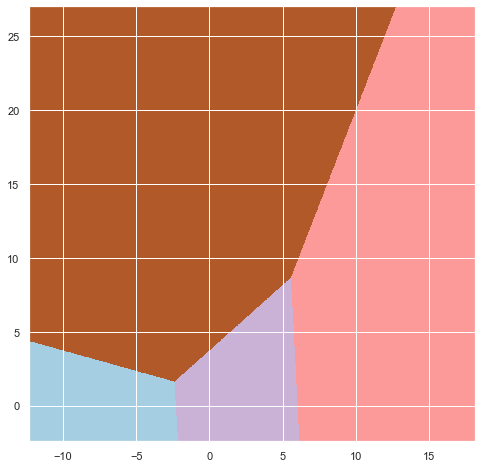

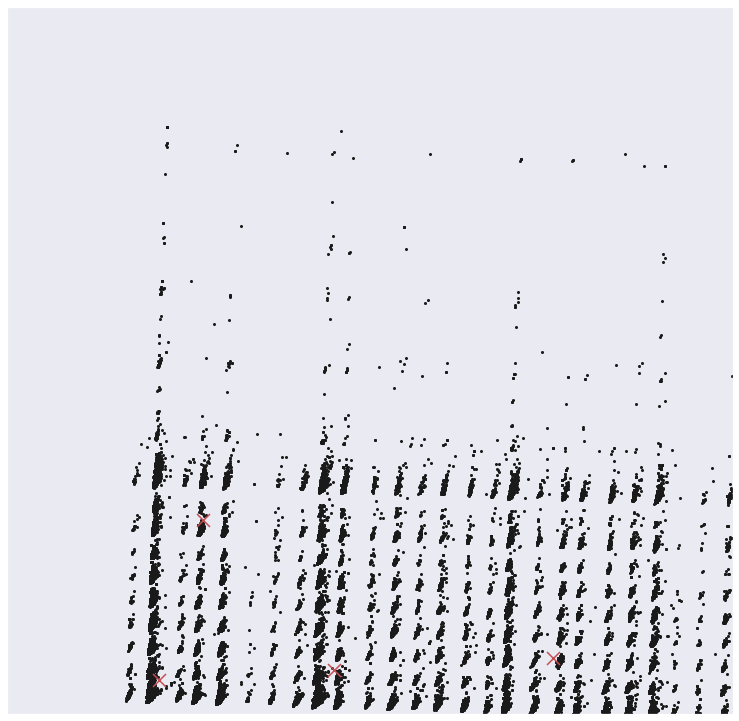

Silhouette Score: 0.6076733376841442


In [79]:
testa_k(pca, 4)

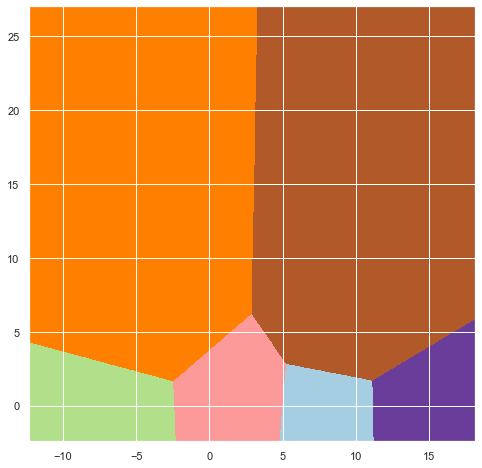

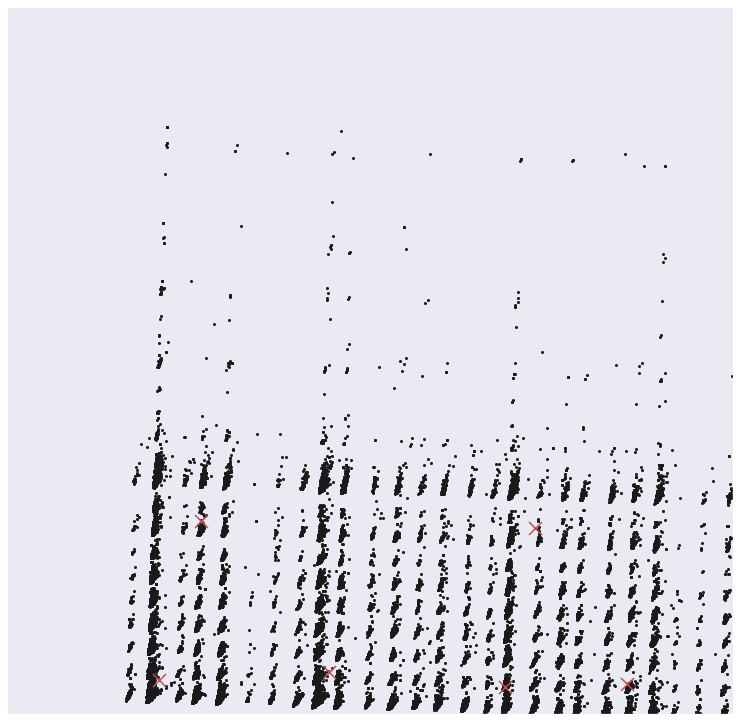

Silhouette Score: 0.6100103984980543


In [76]:
testa_k(pca, 6)

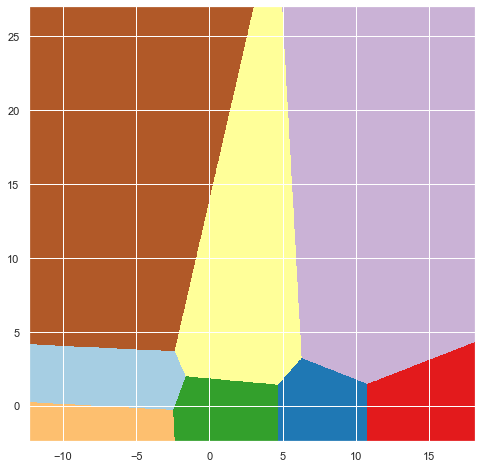

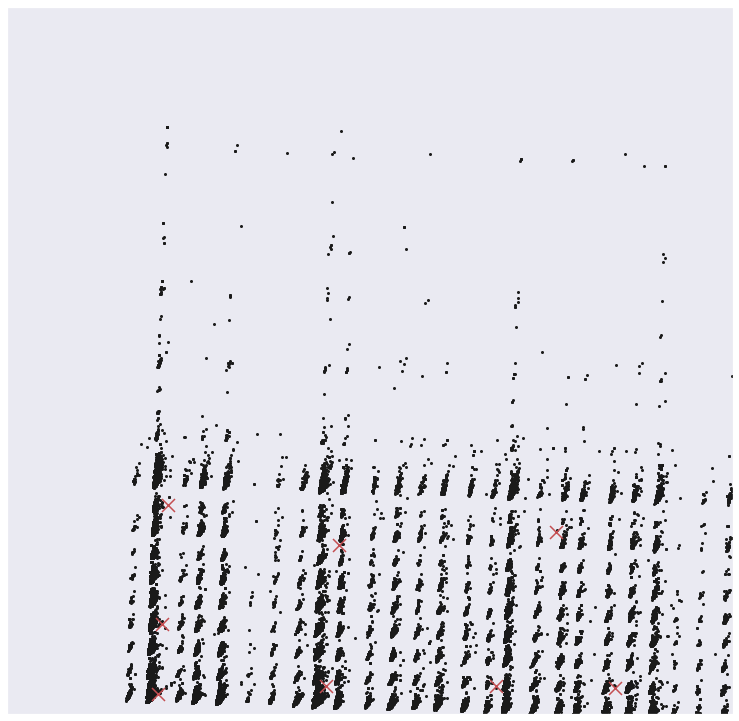

Silhouette Score: 0.5762956509938052


In [78]:
testa_k(pca, 8)

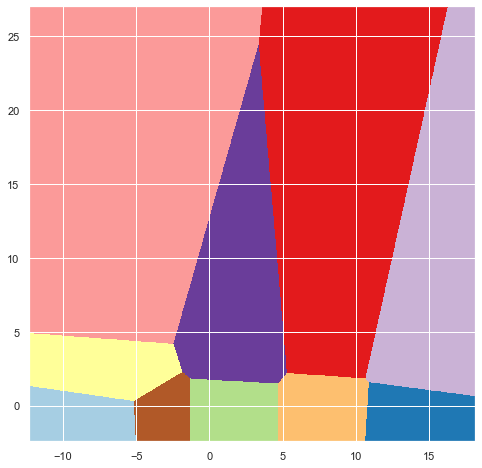

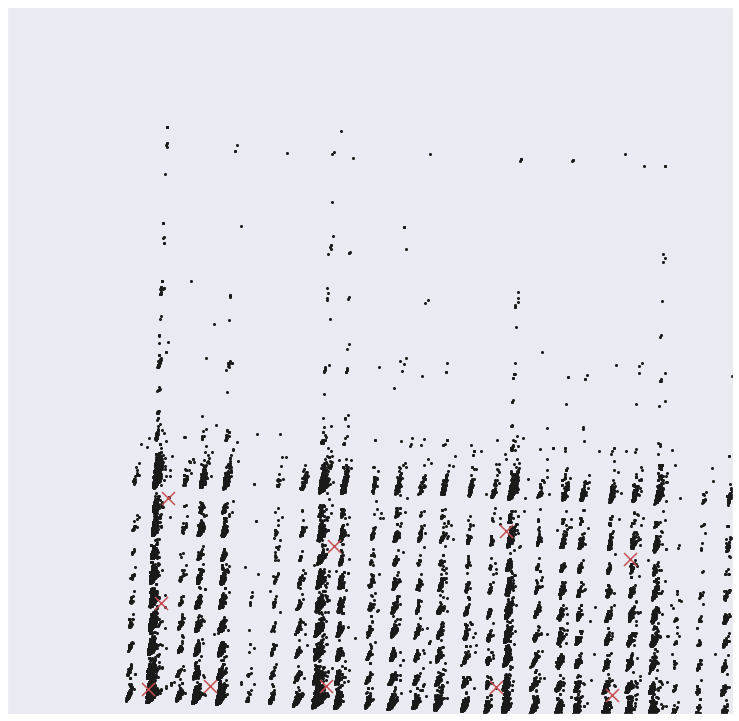

Silhouette Score: 0.5955258351987982


In [77]:
testa_k(pca, 10)